In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
from ipywidgets import IntProgress

In [2]:
dirList = os.listdir("data/WPI/")
fList = []
for filename in dirList: #limit to .csv
    if(filename[-4:] == '.csv'):
        fList.append(filename[:]) 

IntProgress(value=0, max=35)

Text(0,0.5,'File#')

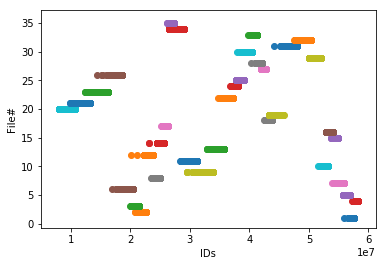

In [10]:
f = IntProgress(min=0, max=len(fList))
display(f)

i = 0
allIDs = []
empty=True
fullDF = -1
for file in fList[:]:
    i+=1
    fDF = pd.read_csv("data/WPI/"+file)
    fDF.columns = ['ContestId', 'SecondsRemaining', 'Entries']
    if(empty):
        fullDF = fDF
        empty = False
    else:
        fullDF = pd.concat([fullDF,fDF])
#     fDF = fDF.set_index('ContestId')
    ids = fDF.ContestId.unique()
    allIDs = allIDs + list(ids)
    ammounts = [i]*len(ids)
    plt.scatter(ids, ammounts)
    f.value+= 1

plt.xlabel("IDs")
plt.ylabel("File#")

In [4]:
def chunkify(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [9]:
i = 0
idMap, dfChunks = {}, []
chunks = list(chunkify(allIDs, 10000))

f = IntProgress(min=0, max=len(chunks))
display(f)

for chunk in chunks[:]:
    i += 1
    idMap["chunk"+str(i)] = chunk
    subDF = fullDF[fullDF['ContestId'].isin(chunk)]
    dfChunks.append(subDF)
    f.value += 1

IntProgress(value=0, max=48)

Text(0,0.5,'Number of entries')

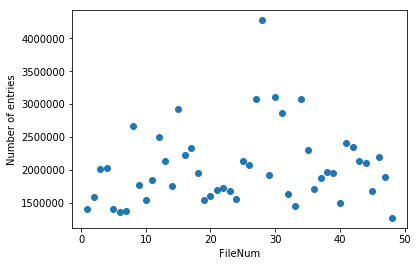

In [13]:
fileNum, count = [], []
i = 0
for df in dfChunks:
    i+=1
    fileNum.append(i)
    count.append(len(df))
plt.scatter(fileNum, count)
plt.xlabel("FileNum")
plt.ylabel("Number of entries")

In [15]:
i = 0
for df in dfChunks:
    i+=1
    df.to_csv("Data/Chunks/chunk"+str(i)+".csv")

In [32]:
fullMap = []
for m in list(idMap.keys()):
    idMap[m]
    for cid in idMap[m]:
        fullMap.append({"ContestId": cid, "Chunk": m})

In [35]:
mapDF =  pd.DataFrame(fullMap).set_index("ContestId")

In [37]:
mapDF.to_csv('data/ChunkMap.csv')